In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [77]:
data=sns.load_dataset('titanic')

In [78]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [79]:
# drop missing value columns
#drop numerical col because chi2 only deal with categorical/categorical
data1=data.drop(columns=['age','deck','fare','alive'])

In [80]:
data1['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [81]:
data1['embark_town']=data1['embark_town'].fillna('Southampton')
data1['embarked']=data1['embarked'].fillna('S')

In [83]:
# encoding of columns

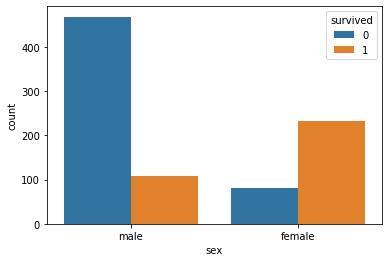

In [84]:
# visualiztion of sex columns
sns.countplot(x='sex',hue='survived',data=data1)

In [85]:
data1['sex']=data1['sex'].replace(['male','female'],[2,1])

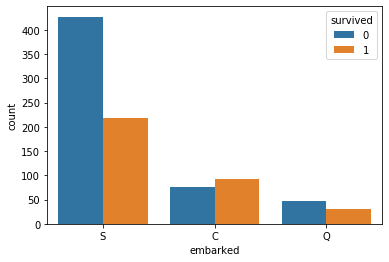

In [86]:
# visualiztion of sex columns
sns.countplot(x='embarked',hue='survived',data=data1)

In [87]:
data1['embarked']=data1['embarked'].replace(['C','Q','S'],[3,2,1])

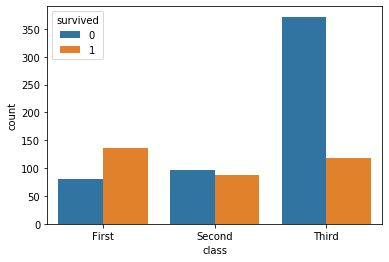

In [88]:
# visualiztion of class columns
sns.countplot(x='class',hue='survived',data=data1)

In [89]:
data1['class']=data1['class'].replace(['First','Second','Third'],[3,2,1])

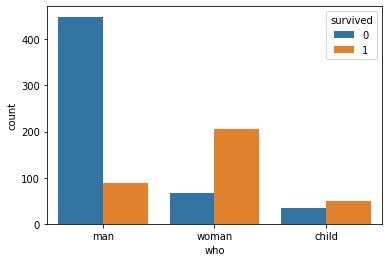

In [90]:
# visualiztion of who columns
sns.countplot(x='who',hue='survived',data=data1)

In [91]:
data1['who']=data1['who'].replace(['woman','child','man'],[3,2,1])

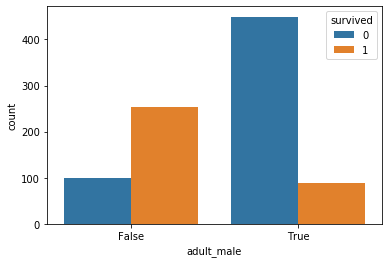

In [92]:
# visualiztion of 'adult_male' columns
sns.countplot(x='adult_male',hue='survived',data=data1)

In [93]:
data1['adult_male']=data1['adult_male'].replace([False,True],[2,1])

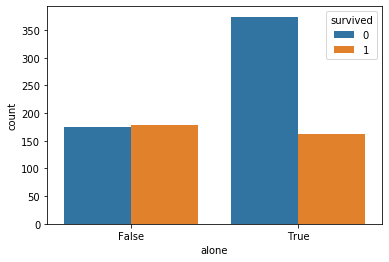

In [94]:
# visualiztion of alone columns
sns.countplot(x='alone',hue='survived',data=data1)

In [98]:
data1['alone']=data1['alone'].replace([False,True],[2,1])

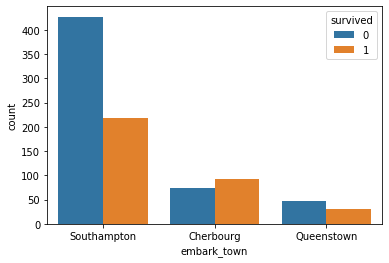

In [100]:
# visualiztion of alone columns
sns.countplot(x='embark_town',hue='survived',data=data1)

In [106]:
data1['embark_town']=data1['embark_town'].replace(['Cherbourg','Queenstown','Southampton'],[3,2,1])

In [112]:
x=data1.iloc[:,1:]

y=data1.iloc[:,0]

In [113]:
# train_test split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# feature selection by chi2 test

In [114]:
f_score=chi2(X_train,y_train)

In [115]:
f_score

(array([ 21.76782335,  28.82401287,   0.1549267 ,   7.98342026,
          7.8087293 ,  29.55234296, 104.74408205,  37.62147723,
          7.8087293 ,   4.97310779]),
 array([3.07717799e-06, 7.92622807e-08, 6.93870999e-01, 4.72076699e-03,
        5.19944524e-03, 5.44268224e-08, 1.38974539e-24, 8.58935115e-10,
        5.19944524e-03, 2.57443501e-02]))

In [117]:
p_value=pd.Series(f_score[1])
p_value.index=X_train.columns
p_value.sort_values(ascending=True,inplace=True)

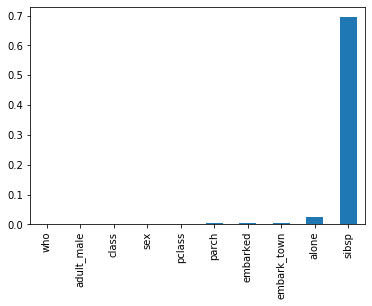

In [118]:
p_value.plot.bar()

In [128]:
select=p_value[p_value<.05]

In [129]:
select.index

Index(['who', 'adult_male', 'class', 'sex', 'pclass', 'parch', 'embarked',
       'embark_town', 'alone'],
      dtype='object')

In [130]:
X_train_p=X_train[select.index]
X_test_p=X_test[select.index]

# model evalution

In [131]:

def run_RandomForest(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,random_state=42)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    print("accuracy of model:",accuracy_score(y_test,pred))

In [132]:
%%time
run_RandomForest(X_train,X_test,y_train,y_test)

accuracy of model: 0.8324022346368715
Wall time: 816 ms


In [133]:
%%time
run_RandomForest(X_train_p,X_test_p,y_train,y_test)

accuracy of model: 0.8212290502793296
Wall time: 818 ms
